In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. Implement the 10-armed Testbed

In [3]:
def get_bandit_function(bandit_mean, bandits_sigma=1):
    def bandit_function(action):
        return np.random.normal(bandit_mean[action], bandits_sigma)
    return bandit_function

In [4]:
# 3. Implementation of a simple ϵ-greedy bandit algorithm

In [5]:
def get_average_rewards(epsilon=0.1, optimistic=0., nb_runs=2000, nb_steps=1000):
    Q_Avg = np.zeros(nb_steps)
    OA = np.zeros(nb_steps)
    for i in range(0, nb_runs):
        Q = np.full((10), optimistic) 
        N = np.zeros(10)
        bandit_mean = np.random.normal(0,1,10)
        optimal_action = np.argmax(bandit_mean)
        bandit_func = get_bandit_function(bandit_mean)
        for j in range(nb_steps):
            if (np.random.random() < epsilon):
                #random exploration
                action = np.random.randint(0,10) 
            else:
                # greedy action
                action = np.argmax(Q)
           
            if (action == optimal_action):
                OA[j] = OA[j] +1
            N[action] = N[action] + 1
            reward = bandit_func(action)
            Q[action] = Q[action] + (1/N[action]) * (reward - Q[action])
            

            Q_Avg[j]= Q_Avg[j] + reward
    for b in range(nb_steps):
        Q_Avg[b] = Q_Avg[b]/ nb_runs
        OA[b] = OA[b]/nb_runs 
   # print OA
    return Q_Avg, OA
        
    """
    Compute the average reward for different 10-armed bandit problems.
    
    Parameters
    ----------
    epsilon : float
        epsilon: probability of chosing a random action (exploration).
    optimistic: float
        Initial value value of all action-values.
    nb_runs: int
        Number of runs with different 10-armed bandits for the averaging.
    nb_steps: int
        Number of steps. How often each bandit is played.
    
    Returns
    -------
    numpy array (dtype: double)
        averaged rewards. i-th element in the array contains the average reward at iteration step i.
    numpy array (dtype: double)
        averaged percentage of using the optimal action. i-th element in the array contains the average reward at iteration step i.    
    """
    raise NotImplementedError()

In [6]:
avg_rewards_e01, optimal_actions_e01 = get_average_rewards(epsilon=0.1, optimistic=0.)
avg_rewards_e005, optimal_actions_e005 = get_average_rewards(epsilon=0.05, optimistic=0.)
avg_rewards_e001, optimal_actions_e001 = get_average_rewards(epsilon=0.01, optimistic=0.)
avg_rewards_greedy, optimal_actions_greedy = get_average_rewards(epsilon=0., optimistic=0.)
nb_steps = len(avg_rewards_e01)


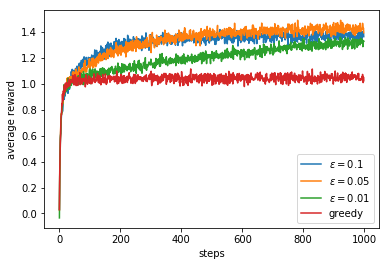

In [7]:
plt.plot(np.arange(nb_steps), avg_rewards_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), avg_rewards_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), avg_rewards_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), avg_rewards_greedy, label='greedy')

plt.legend(loc=4)
plt.xlabel("steps")
plt.ylabel("average reward")
plt.show()


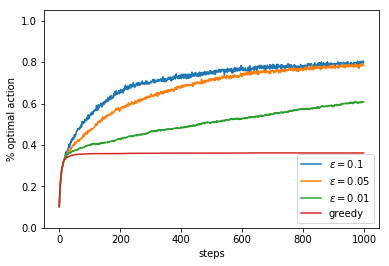

In [ ]:
#plt.autoscale(enable=True, axis='both', tight=True)

plt.plot(np.arange(nb_steps), optimal_actions_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), optimal_actions_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), optimal_actions_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), optimal_actions_greedy, label='greedy')


plt.legend(loc=4)
plt.ylim(0., 1.05)
plt.xlabel("steps")
plt.ylabel("% optimal action")
#plt.axis([0, 1000, 0, 0.11])
plt.show()

In [ ]:
avg_rewards_e01, optimal_actions_e01 = get_average_rewards(epsilon=0.1, optimistic=2.)
avg_rewards_e005, optimal_actions_e005 = get_average_rewards(epsilon=0.05, optimistic=2.)
avg_rewards_e001, optimal_actions_e001 = get_average_rewards(epsilon=0.01, optimistic=2.)
avg_rewards_greedy, optimal_actions_greedy = get_average_rewards(epsilon=0, optimistic=2.)
nb_steps = len(avg_rewards_e01)

In [ ]:
plt.plot(np.arange(nb_steps), avg_rewards_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), avg_rewards_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), avg_rewards_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), avg_rewards_greedy, label='greedy')

plt.legend(loc=4)

plt.xlabel("steps")
plt.ylabel("average reward")
plt.show()

In [ ]:
plt.plot(np.arange(nb_steps), optimal_actions_e01, label='$\epsilon=0.1$')
plt.plot(np.arange(nb_steps), optimal_actions_e005, label='$\epsilon=0.05$')
plt.plot(np.arange(nb_steps), optimal_actions_e001, label='$\epsilon=0.01$')
plt.plot(np.arange(nb_steps), optimal_actions_greedy, label='greedy')

plt.legend(loc=4)
plt.ylim(0., 1.05)
plt.xlabel("steps")
plt.ylabel("% optimal action")
plt.show()